In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
import re
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('/Users/anishdulla/Desktop/VideoGameSales.csv')

In [3]:
df

,Rank,Name,Genre,ESRB_Rating,Platform,Publisher,Developer,Critic_Score,User_Score,Total_Shipped,Global_Sales,NA_Sales,PAL_Sales,JP_Sales,Other_Sales,Year
0,1,Wii Sports,Sports,E,Wii,Nintendo,Nintendo EAD,7.7,NaN,82.86,NaN,NaN,NaN,NaN,NaN,2006.0
1,2,Super Mario Bros.,Platform,NaN,NES,Nintendo,Nintendo EAD,10.0,NaN,40.24,NaN,NaN,NaN,NaN,NaN,1985.0
2,3,Mario Kart Wii,Racing,E,Wii,Nintendo,Nintendo EAD,8.2,9.1,37.14,NaN,NaN,NaN,NaN,NaN,2008.0
3,4,PlayerUnknown's Battlegrounds,Shooter,NaN,PC,PUBG Corporation,PUBG Corporation,NaN,NaN,36.60,NaN,NaN,NaN,NaN,NaN,2017.0
4,5,Wii Sports Resort,Sports,E,Wii,Nintendo,Nintendo EAD,8.0,8.8,33.09,NaN,NaN,NaN,NaN,NaN,2009.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
55787,55788,Indivisible,Role-Playing,NaN,PC,505 Games,Lab Zero Games,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2019.0
55788,55789,Lost Ember,Adventure,RP,PC,Mooneye Studios,Mooneye Studios,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2019.0
55789,55790,Lost Ember,Adventure,RP,PS4,Mooneye Studios,Mooneye Studios,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2019.0
55790,55791,Lost Ember,Adventure,RP,XOne,Mooneye Studios,Mooneye Studios,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2019.0


In [4]:
df.columns

Index(['Rank', 'Name', 'Genre', 'ESRB_Rating', 'Platform', 'Publisher',
       'Developer', 'Critic_Score', 'User_Score', 'Total_Shipped',
       'Global_Sales', 'NA_Sales', 'PAL_Sales', 'JP_Sales', 'Other_Sales',
       'Year'],
      dtype='object')

In [5]:
df["Platform"].unique()

array(['Wii', 'NES', 'PC', 'GB', 'DS', 'X360', 'SNES', 'PS3', 'PS4',
       '3DS', 'PS2', 'GBA', 'NS', 'GEN', 'N64', 'PS', 'XOne', 'WiiU',
       'XB', 'PSP', '2600', 'GC', 'GBC', 'PSN', 'PSV', 'DC', 'SAT', 'SCD',
       'WS', 'XBL', 'Amig', 'VC', 'NG', 'WW', 'PCE', '3DO', 'GG', 'OSX',
       'PCFX', 'Mob', 'And', 'Ouya', 'DSiW', 'MS', 'DSi', 'VB', 'Linux',
       'MSD', 'C128', 'AST', 'Lynx', '7800', '5200', 'S32X', 'MSX', 'FMT',
       'ACPC', 'C64', 'BRW', 'AJ', 'ZXS', 'NGage', 'GIZ', 'WinP', 'iQue',
       'iOS', 'Arc', 'ApII', 'Aco', 'BBCM', 'TG16', 'CDi', 'CD32', 'Int'],
      dtype=object)

In [6]:
df = df.drop(['NA_Sales', 'PAL_Sales', 'JP_Sales', 'Other_Sales'], axis = 1)

In [7]:
df = df[df.Genre != 'Sandbox']
df = df[df.Genre != 'Visual Novel']
df = df[df.Genre != 'Board Game']
df = df[df.Genre != 'Education']
df = df[df.Genre != 'MMO']
df = df[df.Genre != 'Music']
df = df[df.Genre != 'Party']
df = df[df.ESRB_Rating != 'AO']
df = df[df.ESRB_Rating != 'KA']
df = df[df.ESRB_Rating != 'RP']
df = df[df.ESRB_Rating != 'EC']

In [8]:
df

,Rank,Name,Genre,ESRB_Rating,Platform,Publisher,Developer,Critic_Score,User_Score,Total_Shipped,Global_Sales,Year
0,1,Wii Sports,Sports,E,Wii,Nintendo,Nintendo EAD,7.7,NaN,82.86,NaN,2006.0
1,2,Super Mario Bros.,Platform,NaN,NES,Nintendo,Nintendo EAD,10.0,NaN,40.24,NaN,1985.0
2,3,Mario Kart Wii,Racing,E,Wii,Nintendo,Nintendo EAD,8.2,9.1,37.14,NaN,2008.0
3,4,PlayerUnknown's Battlegrounds,Shooter,NaN,PC,PUBG Corporation,PUBG Corporation,NaN,NaN,36.60,NaN,2017.0
4,5,Wii Sports Resort,Sports,E,Wii,Nintendo,Nintendo EAD,8.0,8.8,33.09,NaN,2009.0
...,...,...,...,...,...,...,...,...,...,...,...,...
55784,55785,Ion Maiden,Shooter,NaN,XOne,3D Realms,Voidpoint,NaN,NaN,NaN,NaN,2019.0
55785,55786,Ion Maiden,Shooter,NaN,NS,3D Realms,Voidpoint,NaN,NaN,NaN,NaN,2019.0
55786,55787,In the Valley of Gods,Adventure,NaN,PC,Campo Santo,Campo Santo,NaN,NaN,NaN,NaN,2019.0
55787,55788,Indivisible,Role-Playing,NaN,PC,505 Games,Lab Zero Games,NaN,NaN,NaN,NaN,2019.0


In [9]:
df['Publisher'].unique()

array(['Nintendo', 'PUBG Corporation', 'Mojang', ..., 'Simogo',
       'Amazing Inc.', 'Campo Santo '], dtype=object)

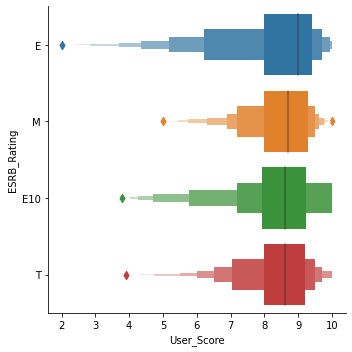

In [10]:
sns.catplot(x="User_Score", y="ESRB_Rating", kind="boxen", data=df)

In [11]:
df1 = df[["Genre", "Critic_Score", "Year"]]

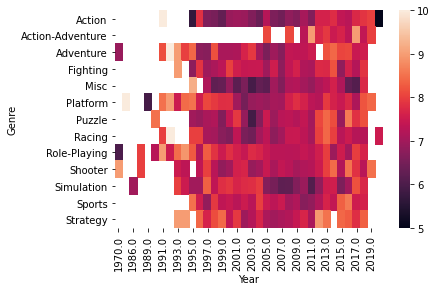

In [12]:
heatmap_data = pd.pivot_table(df1, values='Critic_Score', index=['Genre'], columns='Year')
sns.heatmap(heatmap_data)

In [13]:
df2 = df[["Critic_Score", "Global_Sales", "Platform"]]

In [14]:
df2 = df2.dropna()
df2 = df2.loc[df2['Platform'] == ('X360' or 'PS4' or 'Wii')]

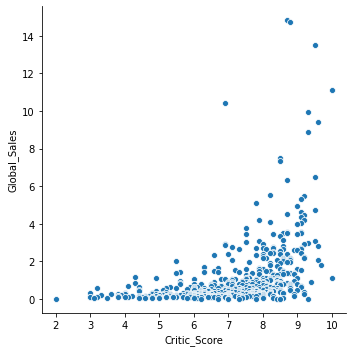

In [15]:
sns.relplot(x="Critic_Score", y="Global_Sales", data=df2)